# Data Wrangling Group Project

In [1]:
#install.packages("tidyverse")
#install.packages("skimr")
#install.packages("readr")
#install.packages("visdat")
library(skimr)
library(readr)
library(visdat)
library(tidyverse)
crash_df <-read_csv("https://raw.githubusercontent.com/zelta1990/crash_data_nz/main/Crash_data_chch.csv")
#crash_df <- read_csv("https://raw.githubusercontent.com/zelta1990/STAT422-Group-Project/main/Crash_data_chch.csv") #Load Crash_data_chch.csv as a dataframe
crash_df %>% head() #check initial dataset
crash_df %>% glimpse() #check column types
crash_df <- crash_df %>% filter(crashYear > 2011)  #only return records after 2012
#crash_df %>% skim() #quick data summary
#crash_df %>% vis_miss(large_data_size = 9e+07)#Visualise missing values

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.3.6      v dplyr   1.0.10
v tibble  3.1.8      v stringr 1.4.1 
v tidyr   1.2.0      v forcats 0.5.1 
v purrr   0.3.4      
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Rows: 51903 Columns: 72
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (20): crashDirectionDescription, crashFinancialYear, crashLocation1, cra...
dbl (50): X, Y, OBJECTID, advisorySpeed, areaUnitID, bicycle, bridge, bus, c...
lgl  (2): crashRoadSideRoad, intersection

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,⋯,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1569263,5177269,2,NA,595000,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1554448,5181256,6,NA,587821,0,0,0,1,0,⋯,0,0,0,0,Open,0,0,1,Light rain,Null
1572260,5180996,8,NA,593300,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1573557,5180808,16,NA,593600,0,NA,0,2,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null
1573407,5180049,22,NA,593600,0,NA,0,1,NA,⋯,NA,NA,0,0,Urban,1,NA,NA,Heavy rain,Null
1568675,5183354,27,NA,592100,0,NA,0,3,NA,⋯,NA,NA,0,0,Urban,0,NA,NA,Fine,Null


Rows: 51,903
Columns: 72
$ X                         <dbl> 1569263, 1554448, 1572260, 1573557, 1573407,~
$ Y                         <dbl> 5177269, 5181256, 5180996, 5180808, 5180049,~
$ OBJECTID                  <dbl> 2, 6, 8, 16, 22, 27, 30, 36, 37, 38, 44, 46,~
$ advisorySpeed             <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ areaUnitID                <dbl> 595000, 587821, 593300, 593600, 593600, 5921~
$ bicycle                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ bridge                    <dbl> NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA~
$ bus                       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,~
$ carStationWagon           <dbl> 2, 1, 2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 0, 1,~
$ cliffBank                 <dbl> NA, 0, NA, NA, NA, NA, NA, 0, NA, NA, NA, NA~
$ crashDirectionDescription <chr> "East", "West", "North", "Null", "Null", "No~
$ crashFinancialYear        <chr> "1999/2000", "1999/2000", "2000/2001", "2000~
$ crashLocation

In [2]:
#Calculate the count of accidents at one location for each year
count_df <- crash_df %>% 
                filter(crashSeverity == "Serious Crash" | crashSeverity == "Fatal Crash" ) %>%
                count(crashLocation1, crashLocation2, crashYear,sort=TRUE) 
#Rank each location by accident count for each year
all_year = list()
for(i in unique(crash_df$crashYear))
{
    year_df <- count_df %>% 
                    filter(crashYear == i ) %>% 
                    arrange(desc(n)) 
    all_year[[i]] <- year_df
}
all_year_df <- bind_rows(all_year)
all_year_df %>% head()
#Using 2021 as an example
#all_year_df %>% filter(crashYear == '2021') 



crashLocation1,crashLocation2,crashYear,n
<chr>,<chr>,<dbl>,<int>
SH 74,RADCLIFFE ROAD,2012,3
MERRIN ST,WITHELLS ROAD,2012,2
SH 75,KINLOCH ROAD S,2012,2
SH 76,COLOMBO ST,2012,2
BARBADOES ST,MOORHOUSE AVENUE,2012,1
BARRINGTON ST,BARRINGTON OFF WBD,2012,1


In [3]:
#    Title: NZTM-WGS84(NZGD2000) converter
#    Author: mkennedy
#    Date: Feb 16, 2012 at 2:32
#    Availability: https://gis.stackexchange.com/questions/20389/converting-nzmg-or-nztm-to-latitude-longitude-for-use-with-r-map-library/20401#20401

#install.packages("proj4")
library(proj4)
get_lat_lon <- function(x,y)
{
    proj4string <- "+proj=tmerc +lat_0=0 +lon_0=173 +k=0.9996 +x_0=1600000 +y_0=10000000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
    #proj4string <- "+proj=tmerc +lat_0=0.0 +lon_0=173.0 +k=0.9996 +x_0=1600000.0 +y_0=10000000.0 +datum=WGS84 +units=m"
    # Source data
    xy <- data.frame(x, y)

    # Transformed data
    pj <- project(xy, proj4string, inverse=TRUE)
    latlon <- data.frame(lat=pj$y, lon=pj$x)
    return(latlon)
}
# an example
lat_lon <- get_lat_lon(1562170,5178795)
lat_lon





lat,lon
<dbl>,<dbl>
-43.54283,172.5317


In [4]:
#Calculate the accumulative count of serious or fatal accidents at one location over ten years and return locations with count > 1
count_all_year_df <- crash_df %>% 
                filter(crashSeverity == "Serious Crash" | crashSeverity == "Fatal Crash" ) %>%
                count(crashLocation1, crashLocation2,sort=TRUE) 
count_all_year_df <- count_all_year_df %>%
                        filter(n > 1) #only return locations with accident count > 1
count_all_year_df %>% head()


crashLocation1,crashLocation2,n
<chr>,<chr>,<int>
GEBBIES PASS ROAD,SUMMIT ROAD,9
DYERS PASS ROAD,SUMMIT ROAD,7
SH 74,RADCLIFFE ROAD,7
DYERS PASS ROAD,CENTAURUS ROAD,6
HILLS ROAD,SHIRLEY ROAD,6
SH 74,MARSHLAND ROAD,6


In [5]:
#Join count_all_year_df with original crash_df to return details for locations that had repeated accidents 
target_df <- inner_join(crash_df, count_all_year_df %>% 
                select(-3), by = c('crashLocation1', 'crashLocation2')) %>%
                filter(crashSeverity == "Serious Crash" | crashSeverity == "Fatal Crash" ) %>% 
                mutate(lat = get_lat_lon(X,Y)$lat, lon=get_lat_lon(X,Y)$lon)
                    
target_df %>% head()

X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,⋯,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB,lat,lon
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
1572933,5184220,129062,NA,592702,0,0,0,1,0,⋯,0,0,Urban,0,0,0,Fine,Null,-43.49446,172.6652
1570500,5178327,129113,NA,594600,0,NA,0,2,NA,⋯,0,0,Urban,1,NA,NA,Fine,Null,-43.54742,172.6348
1574466,5184474,129153,NA,590505,0,NA,0,1,NA,⋯,0,0,Urban,0,NA,NA,Fine,Null,-43.49222,172.6842
1563005,5181023,129372,NA,587812,0,NA,0,1,NA,⋯,0,0,Urban,0,NA,NA,Fine,Null,-43.52282,172.5422
1568560,5178680,130297,NA,594700,1,NA,0,1,NA,⋯,0,0,Urban,0,NA,NA,Fine,Null,-43.54417,172.6108
1569953,5174972,130609,NA,591101,1,NA,0,1,NA,⋯,0,0,Urban,0,NA,NA,Fine,Null,-43.57761,172.6279


In [17]:
#Calculate frequency for factor columns
col_freq_df <- target_df %>% select(-c(X,Y,OBJECTID, areaUnitID,crashFinancialYear,crashDirectionDescription,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,
                                        crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,houseOrBuilding,intersection,meshblockId,minorInjuryCount,
                                        objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,
                                        schoolBus,seriousInjuryCount,suv,taxi,tlaId,tlaName,unknownVehicleType,lat,lon))
all_columns = list()
for(i in 1:ncol(col_freq_df))
{
    df <- col_freq_df[i]
    df
    new_df <- df %>%
                group_by(df[1]) %>%
                tally() %>%
                mutate(percent=round(100*n/sum(n))) %>%
                arrange(desc(percent)) 
    colnames(new_df)[1] <- "value"  
    colnames(new_df)[2] <- "count"         
    new_df <- cbind(name = colnames(col_freq_df[i]), new_df)
    new_df$value <- as.character(new_df$value)
    all_columns[[i]] <- new_df
}
all_col_freq_df <- bind_rows(all_columns)
all_col_freq_df %>% head()
all_columns



,name,value,count,percent
,<chr>,<chr>,<int>,<dbl>
1,advisorySpeed,NA,489,96
2,advisorySpeed,35,8,2
3,advisorySpeed,45,4,1
4,advisorySpeed,65,3,1
5,advisorySpeed,20,1,0
6,advisorySpeed,25,2,0


name,value,count,percent
<chr>,<chr>,<int>,<dbl>
advisorySpeed,NA,489,96
advisorySpeed,35,8,2
advisorySpeed,45,4,1
advisorySpeed,65,3,1
advisorySpeed,20,1,0
advisorySpeed,25,2,0
advisorySpeed,30,1,0
name,value,count,percent
<chr>,<chr>,<int>,<dbl>


In [8]:
# Find number of changes to variables over 10 years. These will be the number of unique values for a specific variable for each crash location 1 and 2

# Number of changes for advisory speed
advsspeed_changes <- target_df  %>% group_by(crashLocation1,crashLocation2)  %>%  summarise(num_advsspeed = length(unique(advisorySpeed)))
arrange(advsspeed_changes , desc(advsspeed_changes$num_advsspeed))  %>%  head(n=10)

# Check manually

check_df <- target_df  %>% filter(crashLocation1 == 'DYERS PASS ROAD' & crashLocation2 == 'SUMMIT ROAD')  %>%  select(crashLocation1,crashLocation2,advisorySpeed,crashSeverity)
check_df

# Number of changes for weatherA
weather_changes <- target_df  %>% group_by(crashLocation1,crashLocation2)  %>%  summarise(num_weather = length(unique(weatherA)))
arrange(weather_changes , desc(weather_changes$num_weather))  %>%  head(n=10)

# Check manually

check_df2 <- target_df  %>% filter(crashLocation1 == 'MARSHS ROAD' & crashLocation2 == 'FOUNTAINS ROAD')  %>%  select(crashLocation1,crashLocation2,weatherA)
check_df2

`summarise()` has grouped output by 'crashLocation1'. You can override using
the `.groups` argument.


crashLocation1,crashLocation2,num_advsspeed
<chr>,<chr>,<int>
GOVERNORS BAY TEDDINGTON,ALLANDALE LANE,3
CHRISTCHURCH AKAROA ROAD,CATONS CV,2
DYERS PASS ROAD,CENTAURUS ROAD,2
DYERS PASS ROAD,HACKTHORNE ROAD,2
DYERS PASS ROAD,PENTRE TERRACE,2
DYERS PASS ROAD,SUMMIT ROAD,2
EVANS PASS ROAD,OCEAN VIEW TERRACE,2
GOVERNORS BAY ROAD,SANDY BEACH ROAD,2
MARSHS ROAD,FOUNTAINS ROAD,2


crashLocation1,crashLocation2,advisorySpeed,crashSeverity
<chr>,<chr>,<dbl>,<chr>
DYERS PASS ROAD,SUMMIT ROAD,NA,Fatal Crash
DYERS PASS ROAD,SUMMIT ROAD,35,Fatal Crash
DYERS PASS ROAD,SUMMIT ROAD,NA,Serious Crash
DYERS PASS ROAD,SUMMIT ROAD,NA,Serious Crash
DYERS PASS ROAD,SUMMIT ROAD,NA,Fatal Crash
DYERS PASS ROAD,SUMMIT ROAD,NA,Serious Crash
DYERS PASS ROAD,SUMMIT ROAD,NA,Fatal Crash


`summarise()` has grouped output by 'crashLocation1'. You can override using
the `.groups` argument.


crashLocation1,crashLocation2,num_weather
<chr>,<chr>,<int>
DYERS PASS ROAD,SUMMIT ROAD,3
FERRY ROAD,FITZGERALD AVENUE,3
SH 74,MARSHLAND ROAD,3
SH 74,RADCLIFFE ROAD,3
ALDWINS ROAD,LINWOOD AVENUE,2
AVONSIDE DRIVE,TRENT ST,2
AWATEA ROAD,SPRINGS ROAD,2
BARBADOES ST,COVENTRY ST,2
BLENHEIM ROAD,WHARENUI ROAD,2


crashLocation1,crashLocation2,weatherA
<chr>,<chr>,<chr>
MARSHS ROAD,FOUNTAINS ROAD,Heavy rain
MARSHS ROAD,FOUNTAINS ROAD,Mist or Fog


In [55]:
#Plotting interactive map using leaflet
#install.packages("shiny")
#install.packages("RColorBrewer")
#install.packages("sp")
#install.packages("htmlwidgets")
#install.packages("IRdisplay")
#install.packages("leaflet.extras2")
#install.packages("ggplot2")
library(sp)
library(leaflet)
library(htmlwidgets)
library(IRdisplay)
library(leaflet.extras2)
library(shiny)
library(RColorBrewer)
library(ggplot2)
d <- as.data.frame(target_df %>%
        select(lat,lon,crashLocation1, crashLocation2,crashYear,trafficControl,light,advisorySpeed,bicycle,cliffBank,flatHill,guardRail,motorcycle,NumberOfLanes,
        roadLane,speedLimit,streetLight,trafficIsland,weatherA,weatherB)) 
d <- replace(d, is.na(d), "Unknown")
acc_by_yeaf_df <- d %>% count(crashYear)
acc_by_yeaf_df$crashYear <- as.character(acc_by_yeaf_df$crashYear)

camera_d <- read.csv("https://raw.githubusercontent.com/zelta1990/STAT422-Group-Project/nzta-camera/cameras.csv") %>%
            filter(region == "Christchurch" | region == "Canterbury")
camera_d$lat <- as.numeric(camera_d$lat)
camera.icon <- makeIcon("https://img.icons8.com/ios/50/000000/camera--v1.png",iconWidth = 20, iconHeight = 20)

ui <- fluidPage(titlePanel(h2("Interactive Map for Crash Data of Christchurch",style='text-align: center;font-size: ')),
                 mainPanel(leafletOutput("m", height=700), width = 8),
                 sidebarPanel( 
                              width = 4,
                              sliderInput("year",
                                          "Year",
                                          min=min(d$crashYear),
                                          max=max(d$crashYear),
                                          value=range(d$crashYear),
                                          step=1, sep=""),
                              selectInput("layer","Select a layer: ", c("trafficControl","light","advisorySpeed","bicycle","cliffBank","flatHill","guardRail","motorcycle","NumberOfLanes",
                                          "roadLane","speedLimit","streetLight","trafficIsland","weatherA","weatherB")),
                              plotOutput("yearPlot"),
                              downloadButton("downloadData", "Download")
                              ))
server <- function(input, output, session){
  
  filteredData <- reactive({
    d[d$crashYear >= input$year[1] & d$crashYear <= input$year[2],]
  })
  d_colour <- colorFactor( palette="RdYlBu", domain=NULL, na.color="transparent")
  output$yearPlot <- renderPlot(
    ggplot(acc_by_yeaf_df, aes(x=crashYear, y=n,group = 1)) + geom_line()+geom_point() + labs(title = "Severe and fatal crash count by year") + xlab("year") + ylab("accident count")
  )
  output$downloadData <- downloadHandler (
      filename = function(){
          paste("d","csv",sep=".")
            },
      
          content = function(file){
           write.csv(filteredData(), file)
            })
  output$m <- renderLeaflet({
    
    leaflet(d) %>% 
      setView( lat=-43.5, lng=172.6 , zoom=10) %>%
      addTiles() %>% 
      addMarkers(lng = camera_d$lon, lat = camera_d$lat, 
                icon = camera.icon,
                popup = paste0("<img src = ", camera_d$imageUrl, " width = 300 >"))%>%
      addCircleMarkers(~d$lon, ~d$lat, 
        fillColor = ~d_colour(d$trafficControl), fillOpacity = 0.7, color="#af4343", radius=8, stroke=FALSE,
        popup=paste0("<br>trafficControl:",d$trafficControl,"<br>lat:", d$lat, "<br>lon:", d$lon,"<br>year:", d$crashYear,"<br>location1:", d$crashLocation1,"<br>location2:", d$crashLocation2 ),
        clusterOptions = markerClusterOptions(),
        group="traffic control"
      ) %>%
      addLegend(pal=d_colour, values=~trafficControl, opacity=0.9, title = "trafficControl", position = "bottomright")
    })
  
  d_colour <-colorFactor( palette="RdYlBu", domain=NULL, na.color="transparent")
  observe({
   
    filtered = filteredData
    leafletProxy("m", data=filteredData()) %>% 
      clearControls() %>%
      clearMarkerClusters()%>%
      addMarkers(lng = camera_d$lon, lat = camera_d$lat, 
            icon = camera.icon,
            popup = paste0("<img src = ", camera_d$imageUrl, " width = 300 >"))%>%
      addCircleMarkers(~lon, ~lat, 
        fillColor = ~d_colour(filteredData()[,input$layer]), fillOpacity = 0.7, color="#af4343", radius=8, stroke=FALSE,
        popup=~paste0("<br>",input$layer,":",filteredData()[,input$layer],"<br>lat:", lat, "<br>lon:", lon,"<br>year:", crashYear ),
        clusterOptions = markerClusterOptions(),
        group=input$layer
       ) %>%
       addLegend(pal=d_colour, values=filteredData()[,input$layer], opacity=0.9, title = input$layer, position = "bottomright")
  } )
}

shinyApp(ui, server) 


Listening on http://127.0.0.1:7749



crashYear,n
<chr>,<int>
2012,58
2013,60
2014,63
2015,53
2016,63
2017,58
2018,51
2019,21
2020,38


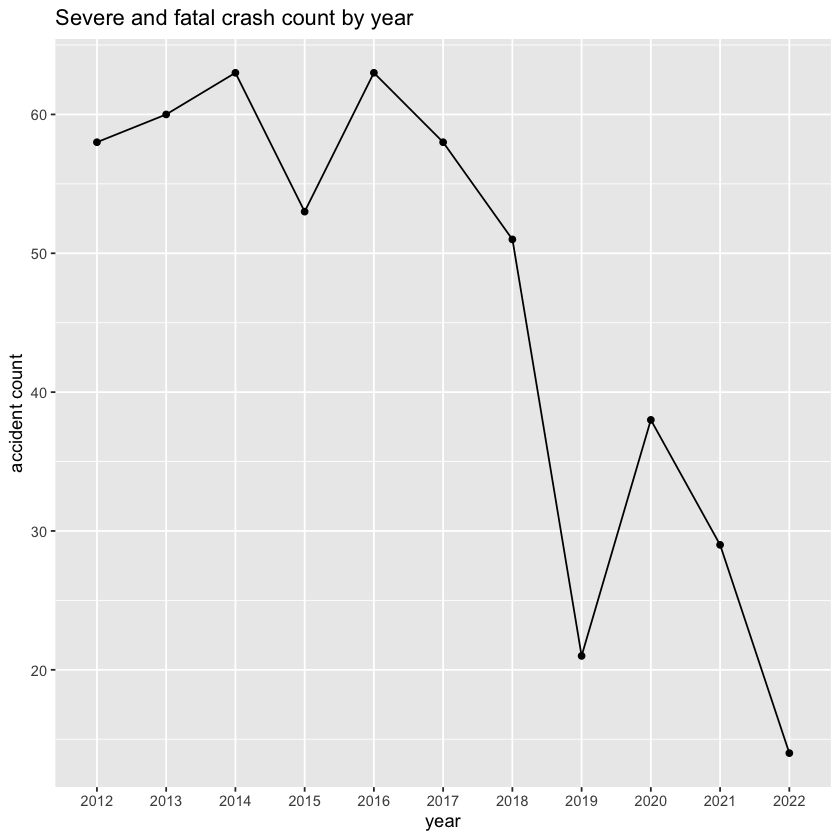

In [54]:
acc_by_yeaf_df <- d %>% count(crashYear)
acc_by_yeaf_df$crashYear <- as.character(acc_by_yeaf_df$crashYear)   
acc_by_yeaf_df
ggplot(acc_by_yeaf_df, aes(x=crashYear, y=n,group = 1)) + geom_line()+ geom_point() + labs(title = "Severe and fatal crash count by year") + xlab("year") + ylab("accident count")
